# Exámen 4. GLM Poisson

## Reconocimiento de Patrones, 2023-2

## Licenciatura en Ciencia de la Computación

Alumno: Enrique Giottonini

Sea $\hat{y} = e^{w^T x + b}$ la predicción de un modelo de regresión logística. La máxima verisimilitud se obtiene de:
$$
\prod \frac{e^{y\ln{\hat{y}} - \hat{y}}}{y!}
$$

La log-verisimilitud es:
$$
\sum y\ln{\hat{y}} - \hat{y} - \ln{y!}
$$

El error en muestra:
$$
E_{in}(w, b) = -\frac{1}{N} \sum_{n=1}^N y_n\ln{\hat{y}_n} - \hat{y}_n
$$
$$
w, b = \arg\min_{w, b} \frac{1}{N} \sum_{n=1}^N \hat{y}_n - y_n\ln{\hat{y}_n}

$$

Para implementar las funciones de aprendizaje utilizando el gradiente tenemos que:

$$
\frac{\partial E_{in}}{\partial w} = \frac{1}{N} \sum_{n=1}^N \left( \hat{y}_n -y_n \right) x_n
$$

$$
\frac{\partial E_{in}}{\partial b} = \frac{1}{N} \sum_{n=1}^N \left(\hat{y}_n - y_n \right)
$$

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma


plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('ggplot')

In [62]:
def E_in(x, y, w, b):
    """
    Calcula el error en muestra para el modelo lineal generalizado de Poisson.
    """
    N = x.shape[0]
    y_hat = np.exp(x @ w + b)

    error_en_muestra = 1/N * np.sum(y_hat - y * np.log(y_hat))    
    return error_en_muestra

def gradiente(x, y, w, b):
    """
    Calcula el gradiente de la función de perdida para el modelo lineal generalizado de Poisson.
    """
    N, _ = x.shape
    y_hat = np.exp(x @ w + b)
    dw = 1/N * x.T @ (y_hat - y)
    db = (y_hat - y).mean()
    
    return dw, db

def descenso_rl_lotes(x, a, nu, max_iter=10**4, historial=False):
    
    M, n = x.shape
    w = np.zeros(n)
    b = 0.0

    if historial:
        error_hist = np.zeros(max_iter)
        error_hist[0] = None
    else:
        error_hist = None
        
    for epoch in range(1, max_iter):
        dw, db = gradiente(x, a, w, b)
    
        w = w - nu * dw
        b = b - nu * db
        
        if historial:
            error_hist[epoch] = E_in(x, a, w, b)
            
    return w, b, error_hist

Generamos datos sintéticos con distribución de Poisson.

In [64]:
np.random.seed(37)

M = 10_000
x = np.hstack([
    np.random.normal(0.0, 1.0, M).reshape(M, 1),
    np.random.normal(0.0, 1.0, M).reshape(M, 1),
    np.random.normal(0.0, 1.0, M).reshape(M, 1)
])
z = np.dot(x, np.array([0.15, 0.5, 0.2])) + 2.0 + np.random.normal(0.0, 0.01, M)
y = np.exp(z)

Text(0.5, 1.0, 'Distribución de la variable aleatoria $y$')

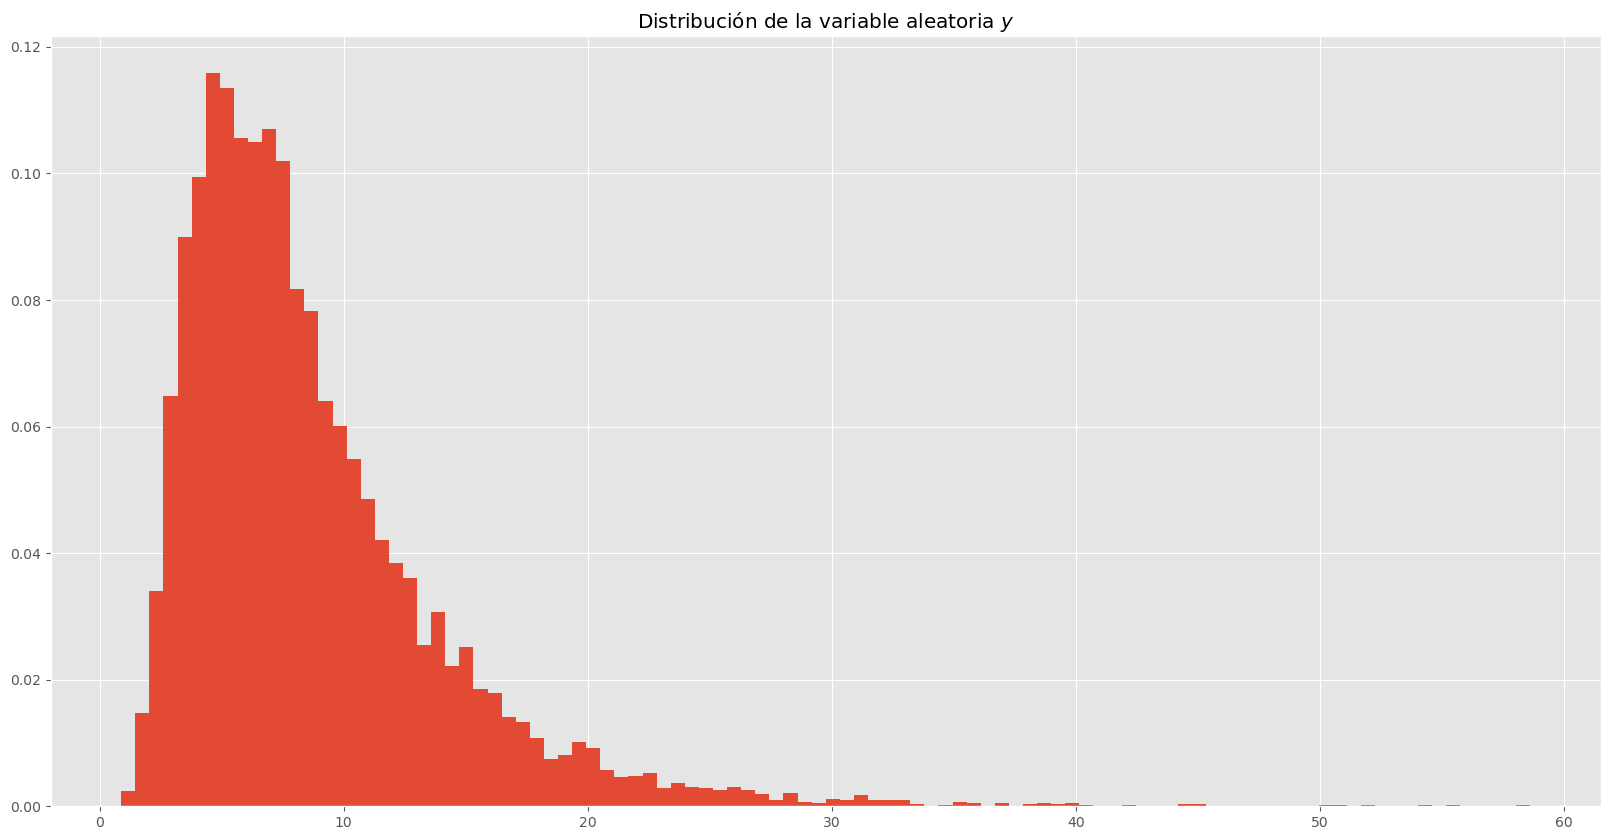

In [66]:
# plot distribution
plt.hist(y, bins=100, density=True)
plt.title('Distribución de la variable aleatoria $y$')

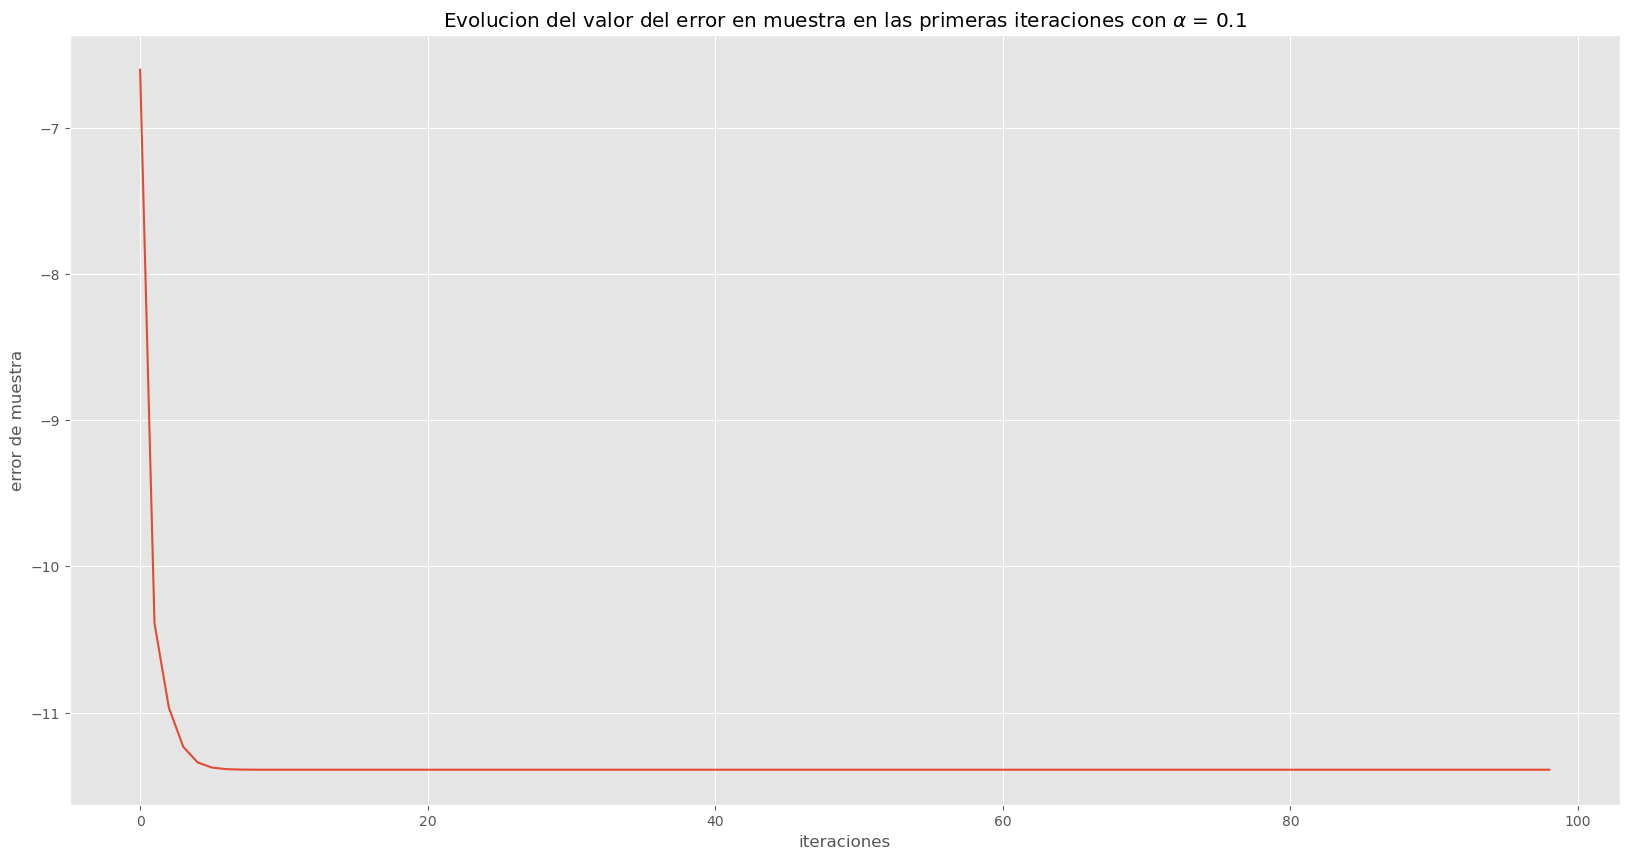

In [73]:
alpha = 1e-1
epochs = 100
w, b, error_hist = descenso_rl_lotes(x, y, alpha, max_iter=epochs, historial=True)

plt.plot(range(epochs-1), error_hist[1:])
plt.title(r'Evolucion del valor del error en muestra en las primeras iteraciones con $\alpha$ = ' + str(alpha))
plt.xlabel('iteraciones')
plt.ylabel('error de muestra')
plt.show()